# Baseline models 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

## Read the data 

In [3]:
# source: https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv

df = pd.read_csv('data/monthly-milk-production-pounds.csv')
df.columns = ['Month', 'Milk']

df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


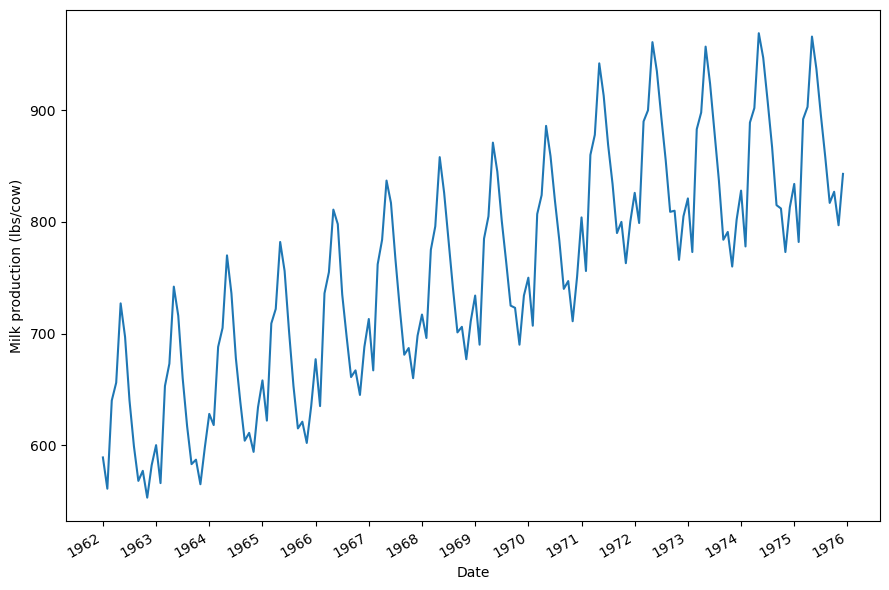

In [4]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

## Train/test split 

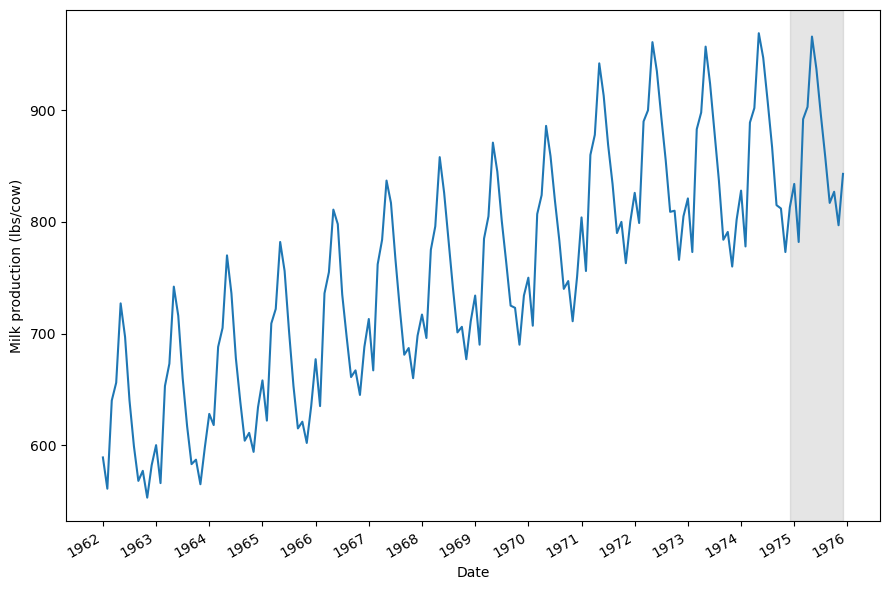

In [5]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
train = df[:-12]
test = df[-12:]

## Baseline 1: Predict the mean 

In [8]:
pred_df = test.copy()

pred_df['mean'] = np.mean(train['Milk'])

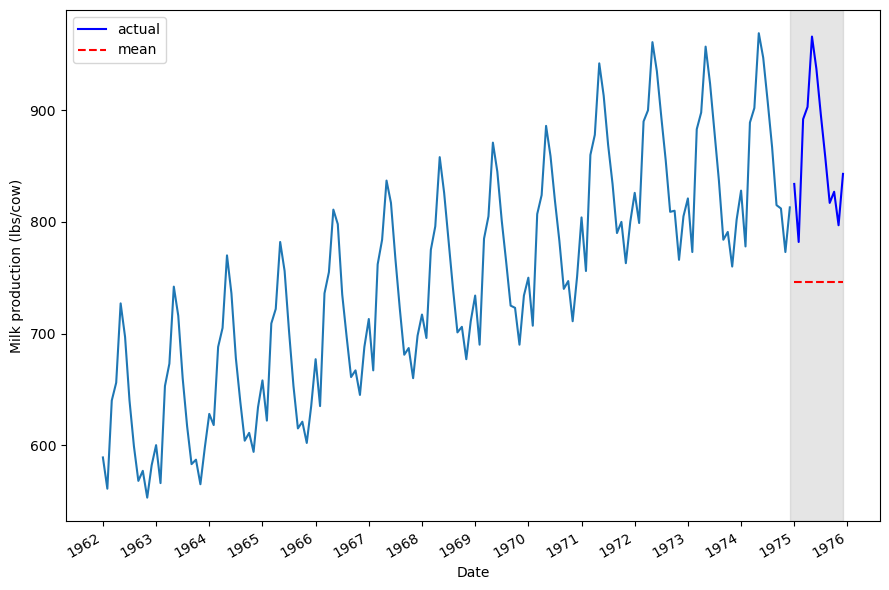

In [10]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 2: Predict last year's mean 

In [11]:
pred_df['mean_last_year'] = np.mean(train['Milk'][-12:])

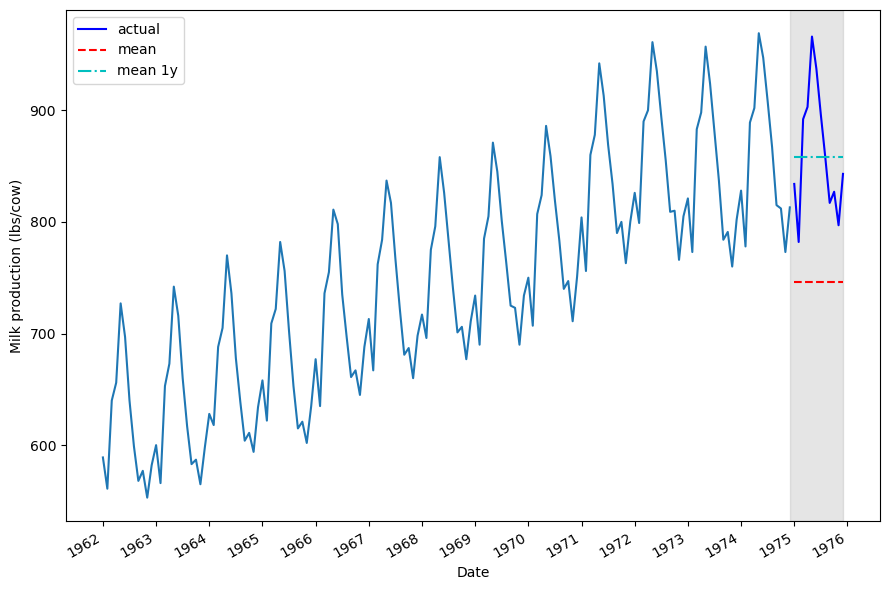

In [15]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 3: Predict the last known value 

In [17]:
pred_df['last'] = train['Milk'].iloc[-1]

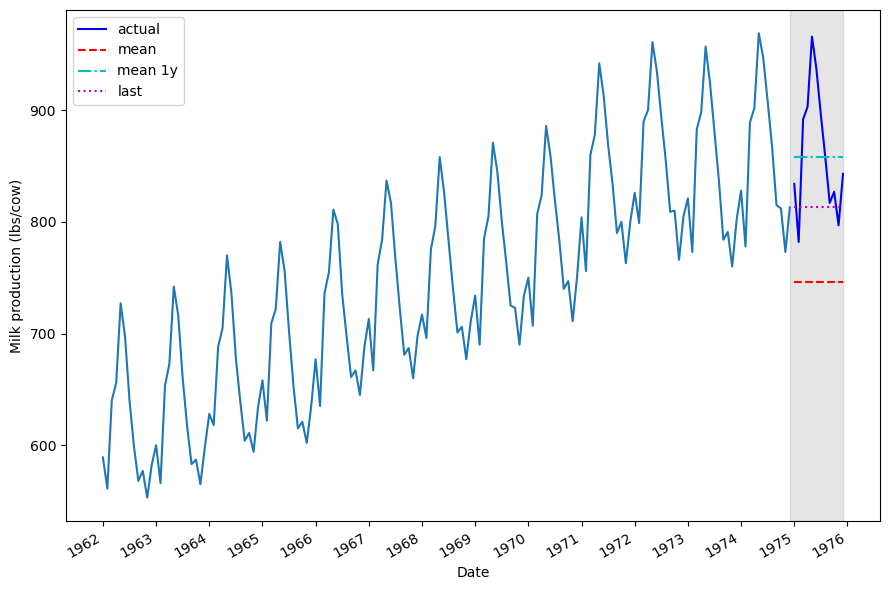

In [22]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 4: Predict the last season 

In [28]:
pred_df['last_season'] = train['Milk'][-12:].values

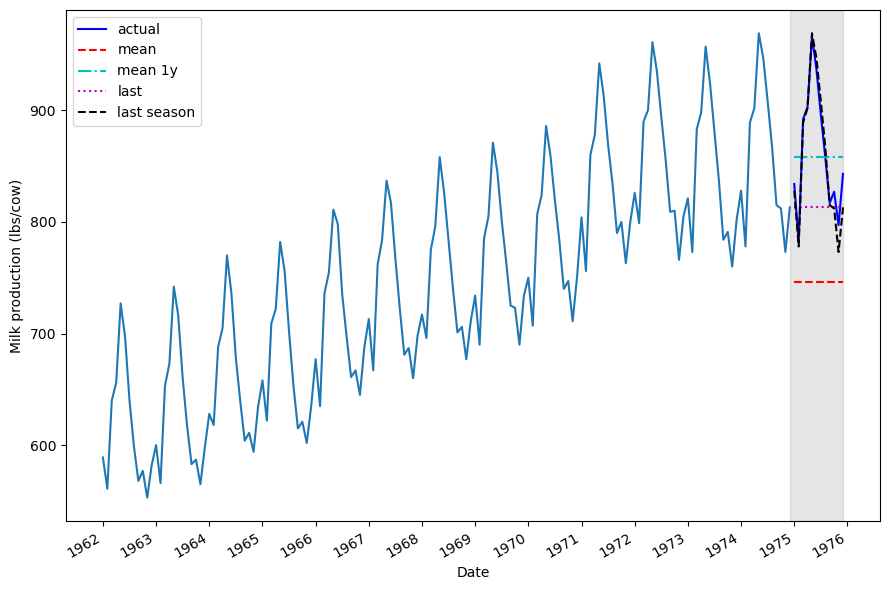

In [29]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
ax.plot(pred_df['last_season'], 'k--', label='last season')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Evaluation 

In [33]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [34]:
mape_mean = mape(pred_df['Milk'], pred_df['mean'])
mape_mean_1y = mape(pred_df['Milk'], pred_df['mean_last_year'])
mape_last = mape(pred_df['Milk'], pred_df['last'])
mape_last_season = mape(pred_df['Milk'], pred_df['last_season'])

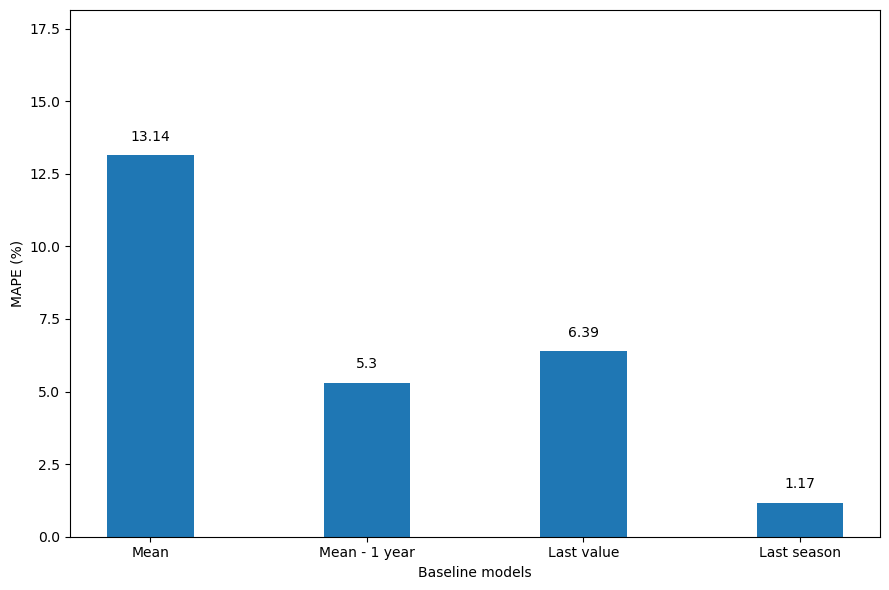

In [37]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last value', 'Last season']
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')
    
plt.tight_layout()